In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM,Activation , Dense , Dropout,Input , Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [3]:
# importing the file from the pc

In [4]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [5]:
import io
df = pd.read_csv("/content/spam.csv",delimiter=',' ,encoding='latin-1')
print(df.head())

     v1  ... Unnamed: 4
0   ham  ...        NaN
1   ham  ...        NaN
2  spam  ...        NaN
3   ham  ...        NaN
4   ham  ...        NaN

[5 rows x 5 columns]


In [6]:
# lets find the rows and columns
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# lets find the nun values in the data
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
# lets remove the data's which has the more number of null values

df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1 , inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.columns

Index(['v1', 'v2'], dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'no of ham and spam messages')

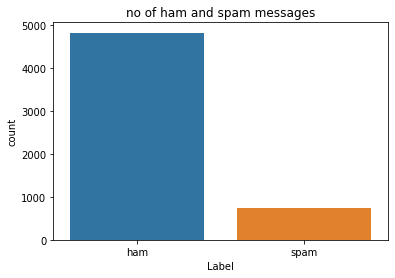

In [11]:
# lets understand the dataset
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('no of ham and spam messages') 

In [12]:
X = df.v2
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [13]:
Y = df.v1
Y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: v1, dtype: object

In [14]:
# lets decode them by using labelencoder
le = LabelEncoder()
Y = le.fit_transform(Y)
Y

array([0, 0, 1, ..., 0, 0, 0])

In [15]:
Y.shape

(5572,)

In [16]:
# lets convert them into the 2D Format
Y = Y.reshape(-1,1)
Y.shape

(5572, 1)

In [17]:
# split the training and the test data
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.20)

In [18]:
X_train.shape

(4457,)

In [19]:
Y_train.shape

(4457, 1)

In [20]:
Y_test.shape

(1115, 1)

In [21]:
X_test.shape

(1115,)

Process the data
and

tokenize


In [23]:
# lets take 1000 words
max_words = 1000
max_len = 150

tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
tok

In [24]:
sequences = tok.texts_to_sequences(X_train)
sequences

[[80, 86, 2, 259],
 [807, 178, 76, 187, 14, 44, 150],
 [89, 120, 3, 16, 10, 35, 21, 390],
 [354, 3, 1, 707, 65, 3, 23, 125, 1, 27, 14],
 [11, 8, 250, 3, 309, 4, 130, 923],
 [175,
  324,
  112,
  37,
  708,
  15,
  539,
  82,
  68,
  521,
  2,
  21,
  808,
  809,
  105,
  176,
  310,
  808,
  864,
  290],
 [709,
  9,
  710,
  194,
  355,
  64,
  72,
  23,
  183,
  10,
  52,
  45,
  3,
  7,
  22,
  235,
  71,
  2,
  810,
  7,
  76,
  109,
  126,
  2,
  865],
 [325,
  102,
  251,
  540,
  444,
  1,
  501,
  1,
  260,
  118,
  138,
  445,
  148,
  1,
  274,
  102,
  924,
  132,
  188,
  57,
  102,
  540],
 [35, 590, 356, 3],
 [21, 6, 866, 56, 446, 56, 1, 9, 19, 83, 447, 79, 502, 121, 6, 43, 391, 541],
 [35, 14, 44, 7, 522, 86, 925, 2, 33, 118],
 [97, 121, 107, 2, 37],
 [47, 84],
 [372, 218, 33, 113, 12, 4, 392, 87, 3, 94, 236, 41],
 [103, 16, 36, 2, 25, 13, 176, 105, 46, 15, 542, 344, 867, 82, 711, 2, 7, 591],
 [74, 1, 241, 275, 3, 19, 40],
 [97,
  665,
  172,
  6,
  119,
  3,
  22,
  302,

In [25]:
sequences_matrix = sequence.pad_sequences(sequences , maxlen= max_len)
sequences_matrix

array([[  0,   0,   0, ...,  86,   2, 259],
       [  0,   0,   0, ...,  14,  44, 150],
       [  0,   0,   0, ...,  35,  21, 390],
       ...,
       [  0,   0,   0, ..., 392,   3, 211],
       [  0,   0,   0, ..., 157,   4,  15],
       [  0,   0,   0, ..., 703,  37, 738]], dtype=int32)

In [ ]:
# Using RNN
# need to define the Rnn Structure

In [32]:
def RNN():
    i = Input(name='inputs',shape=[max_len])
    x = Embedding(max_words,50,input_length=max_len)(i)
    x = LSTM(64)(x)
    x = Dense(256,name='FC1')(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(1,name='out_layer')(x)
    x = Activation('sigmoid')(x)
    model = Model(inputs=i,outputs=x)
    return model

In [33]:
# lets call the functions and compile the model
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy' , optimizer= RMSprop(),
              metrics=['accuracy'])

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                

In [34]:
# lets Fit the Training data
r = model.fit(sequences_matrix,
              Y_train,
              batch_size = 128 ,
              epochs = 10,
              validation_split = 0.2,
              callbacks = [EarlyStopping(monitor='val_loss',
                                         min_delta = 0.0001)])

Epoch 1/10
28/28 [==============================] - 5s 196ms/step - loss: 0.3502 - accuracy: 0.8684 - val_loss: 0.1606 - val_accuracy: 0.9406
Epoch 2/10
28/28 [==============================] - 5s 180ms/step - loss: 0.0976 - accuracy: 0.9748 - val_loss: 0.0647 - val_accuracy: 0.9832
Epoch 3/10
28/28 [==============================] - 5s 175ms/step - loss: 0.0433 - accuracy: 0.9874 - val_loss: 0.0516 - val_accuracy: 0.9854
Epoch 4/10
28/28 [==============================] - 5s 176ms/step - loss: 0.0319 - accuracy: 0.9919 - val_loss: 0.0485 - val_accuracy: 0.9888
Epoch 5/10
28/28 [==============================] - 5s 174ms/step - loss: 0.0239 - accuracy: 0.9935 - val_loss: 0.0462 - val_accuracy: 0.9865
Epoch 6/10
28/28 [==============================] - 5s 175ms/step - loss: 0.0201 - accuracy: 0.9941 - val_loss: 0.0533 - val_accuracy: 0.9843


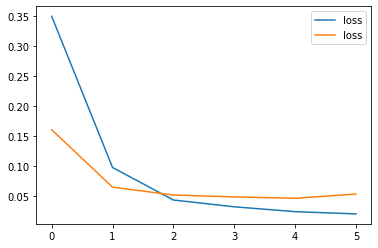

In [35]:
# Lets plot teh iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'] , label = 'loss')
plt.plot(r.history['val_loss'] , label = 'loss')
plt.legend()

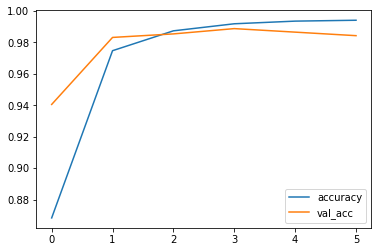

In [37]:
# plotting the graph accuracy per iteration
plt.plot(r.history['accuracy'] , label = 'accuracy')
plt.plot(r.history['val_accuracy'] , label = 'val_acc')
plt.legend()

In [39]:
# process of the test data set

test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences , 
                                               maxlen = max_len)

In [43]:
# evaluating the model on the test dataset 
accr  = model.evaluate(test_sequences_matrix , Y_test)


35/35 [==============================] - 1s 19ms/step - loss: 0.0615 - accuracy: 0.9785


In [44]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.061
  Accuracy: 0.978
